c:\ProgramData\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


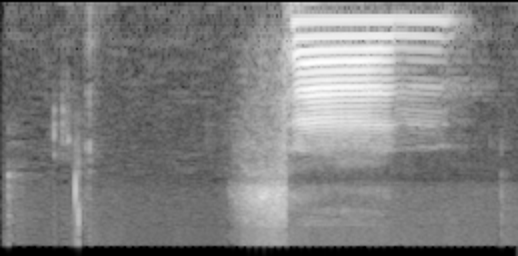

In [ ]:
import torchaudio
from pydub import AudioSegment
import numpy as np
from PIL import Image
from IPython.display import display

# Convert ogg to wav
audio = AudioSegment.from_file('../recordings/stageI/21/a3.ogg')
audio.export("output2.wav", format="wav")

# Load wav and get mel spectrogram
waveform, sr = torchaudio.load("output2.wav")
mel_spec = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_fft=1024, hop_length=256, n_mels=128)(waveform)

# Convert tensor to numpy
mel_spec_np = mel_spec[0].cpu().detach().numpy()

# Convert power to dB (log scale)
mel_spec_db = 10 * np.log10(mel_spec_np + 1e-10)  # add epsilon to avoid log(0)

# Normalize dB values to 0-255
mel_spec_norm = 255 * (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min())
mel_spec_img = mel_spec_norm.astype(np.uint8)

# Create and display image
img = Image.fromarray(mel_spec_img)
img = img.resize((mel_spec_img.shape[1]*2, mel_spec_img.shape[0]*2))
display(img)


In [27]:
from pydub import AudioSegment, silence

audio = AudioSegment.from_file('../recordings/stageI/21/a3.ogg')

# Detect non-silent intervals
non_silence = silence.detect_nonsilent(audio, min_silence_len=500, silence_thresh=-50)

if non_silence:
    start_trim = non_silence[0][0]
    end_trim = non_silence[-1][1]
    trimmed_audio = audio[start_trim:end_trim]
else:
    trimmed_audio = audio  # no silence detected

trimmed_audio.export("output2_trimmed.wav", format="wav")


<_io.BufferedRandom name='output2_trimmed.wav'>

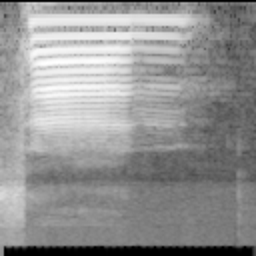

In [28]:
import torchaudio
from pydub import AudioSegment
import numpy as np
from PIL import Image
from IPython.display import display


# Load wav and get mel spectrogram
waveform, sr = torchaudio.load("output2_trimmed.wav")
mel_spec = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_fft=1024, hop_length=256, n_mels=128)(waveform)

# Convert tensor to numpy
mel_spec_np = mel_spec[0].cpu().detach().numpy()

# Convert power to dB (log scale)
mel_spec_db = 10 * np.log10(mel_spec_np + 1e-10)  # add epsilon to avoid log(0)

# Normalize dB values to 0-255
mel_spec_norm = 255 * (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min())
mel_spec_img = mel_spec_norm.astype(np.uint8)

# Create and display image
img = Image.fromarray(mel_spec_img)
img = img.resize((mel_spec_img.shape[1]*2, mel_spec_img.shape[0]*2))
display(img)
